#TP1-Ejercicio1-Hopfield

##Sección de carga de datos

In [ ]:
!pip install gdown
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
img1 = cv2.imread('drive/MyDrive/imagenes/paloma.bmp')
img2 = cv2.imread('drive/MyDrive/imagenes/panda.bmp')
img3 = cv2.imread('drive/MyDrive/imagenes/perro.bmp')
img4 = cv2.imread('drive/MyDrive/imagenes/quijote.bmp')
img5 = cv2.imread('drive/MyDrive/imagenes/torero.bmp')
img6 = cv2.imread('drive/MyDrive/imagenes/v.bmp')

##Transformación de las imágenes

Ahora averiguamos la cantidad de píxeles por imagen

In [ ]:
#Funciones para manejar las imagenes
def cargar_imagen(ruta, lado):
  imagen = Image.open(ruta)
  imagen = imagen.resize((lado, lado))
  imagen = imagen.convert('1')
  imagen = 2 * np.array(imagen, int) - 1
  return (imagen.flatten())


def mostrar_imagen(img_array):
    side = int(np.sqrt(img_array.shape[0]))
    img_array = img_array.reshape((side, side))
    plt.figure(figsize=(3, 3))
    plt.imshow(img_array, cmap='gray')
    plt.axis('off')
    plt.show()

def modificar_imagen(n, imagen):
#Hacemos que una parte de la imagen sea negativa
  for i in range(n):
    if i > (0.55*n) - 1:
      imagen[i] = -1
  return imagen

def modificar_imagen2(n, imagen, porcentaje_superior=0.05, porcentaje_inferior=0.05):
  pixeles_superior = int(porcentaje_superior*n)
  pixeles_inferior = int(porcentaje_inferior*n)
  for i in range(pixeles_superior):
    imagen[i] = - 1

  for i in range(n - pixeles_inferior, n):
    imagen[i] = - 1
  return imagen

def agregar_ruido(imagen, porcentaje_ruido):


  imagen_con_ruido = imagen.copy()
  num_pixeles = imagen_con_ruido.size
  num_pixeles_ruido = int(porcentaje_ruido * num_pixeles)

  indices_ruido = np.random.choice(num_pixeles, size = num_pixeles_ruido, replace=False)

  for indice in indices_ruido:
    #Obtener el valor actual del pixel
    valor_actual = imagen_con_ruido.flat[indice]

    #Cambiar el valor actual del pixel al valor opuesto
    imagen_con_ruido.flat[indice] = -valor_actual

  return imagen_con_ruido

def borrar_pixeles(imagen, porcentaje_borrado):
  imagen_borrada = imagen.copy()
  num_pixeles = imagen_borrada.size
  num_pixeles_borrados = int(porcentaje_borrado * num_pixeles)

  indices_borrados = np.random.choice(num_pixeles, size = num_pixeles_borrados, replace=False)

  for indice in indices_borrados:
    imagen_borrada.flat[indice] = 0

  return imagen_borrada

##Entrenamiento

In [ ]:
def calcular_pesos(imagen):
  return (np.outer(imagen, imagen))

def completar_ceros_diagonal(matriz_pesos):
    np.fill_diagonal(matriz_pesos, 0)
    return matriz_pesos

def reconstruir_imagen(n, matriz_red_pesos, estado):
  for i in range(n):
    suma = 0;
    for j in range(n):
      suma += matriz_red_pesos[j,i]*estado[j]
    estado[i] = 1 if suma > 0 else -1
  return estado

def sumar_matrices_pesos(lista_matrices):
  suma = np.zeros(lista_matrices[0].shape)
  for matriz in lista_matrices:
    suma += matriz
  return suma

##Inciso a)

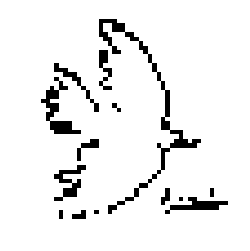

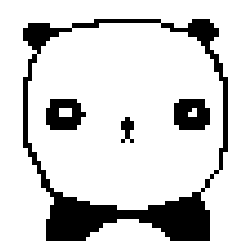

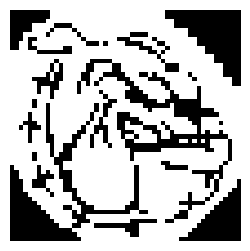

[[0. 3. 3. ... 3. 3. 3.]
 [3. 0. 3. ... 3. 3. 3.]
 [3. 3. 0. ... 3. 3. 3.]
 ...
 [3. 3. 3. ... 0. 3. 3.]
 [3. 3. 3. ... 3. 0. 3.]
 [3. 3. 3. ... 3. 3. 0.]]


In [ ]:
lado = 52
n = lado*lado
lista_imagenes =[]
imagen0 = cargar_imagen('paloma.bmp', lado)
imagen1 = cargar_imagen('panda.bmp', lado)
imagen2 = cargar_imagen('perro.bmp', lado)

lista_imagenes.append(imagen0)
lista_imagenes.append(imagen1)
lista_imagenes.append(imagen2)

for imagen in lista_imagenes:
  mostrar_imagen(imagen)
lista_matrices_pesos = []
for imagen in lista_imagenes:
  matriz_peso = calcular_pesos(imagen)
  matriz_peso = completar_ceros_diagonal(matriz_peso)
  lista_matrices_pesos.append(matriz_peso)

matriz_red_pesos = sumar_matrices_pesos(lista_matrices_pesos)
print(matriz_red_pesos)

Para verificar si la red aprendio de las imagenes, las vamos a usar como entradas para comprobar que la red pueda converger a ellas mismas (Es decir, que no cambie).

In [ ]:
for imagen in lista_imagenes:
  imagen_original = imagen.copy()
  imagen_reconstruida = reconstruir_imagen(n, matriz_red_pesos, imagen_original.copy())
  #Compara la imagen reconstruida con la original
  if (np.array_equal(imagen_original, imagen_reconstruida)):
    print("La imagen si fue aprendida")
  else:
    print("La imagen no fue aprendida")

La imagen si fue aprendida
La imagen si fue aprendida
La imagen si fue aprendida


##Inciso b)

###Seccion de prueba con imagenes tapadas

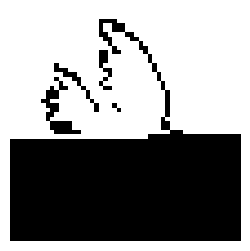

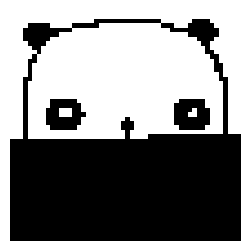

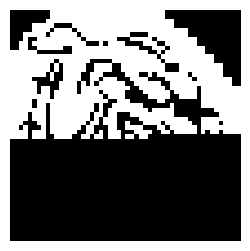

In [ ]:
#Set de imagenes iniciales alteradas
imagenes_modificadas = []
for imagen in lista_imagenes:
  estado = modificar_imagen(n, imagen.copy())
  imagenes_modificadas.append(estado)

for imagen in imagenes_modificadas:
  mostrar_imagen(imagen)

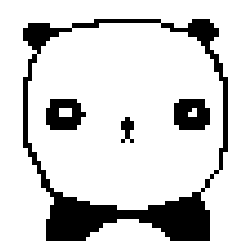

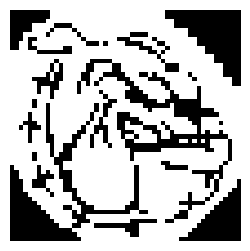

In [ ]:
#Reconstruimos las imagenes
imagenes_reconstruidas = []

imagen_reconstruida = reconstruir_imagen(n, matriz_red_pesos, imagenes_modificadas[1].copy())
imagenes_reconstruidas.append(imagen_reconstruida)
imagen_reconstruida = reconstruir_imagen(n, matriz_red_pesos, imagenes_modificadas[2].copy())
imagenes_reconstruidas.append(imagen_reconstruida)
for imagen in imagenes_reconstruidas:
  mostrar_imagen(imagen)

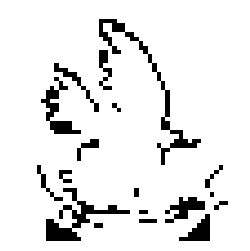

In [ ]:
imagen_reconstruida = reconstruir_imagen(n, matriz_red_pesos, imagenes_modificadas[0].copy())
mostrar_imagen(imagen_reconstruida)
imagenes_reconstruidas.append(imagen_reconstruida)

###Seccion de pruebas con imagenes con ruido

Ahora probamos el recuperador pero usando las imagenes para agregarle ruido

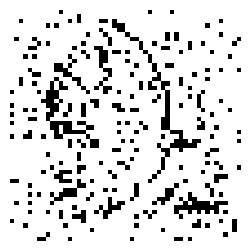

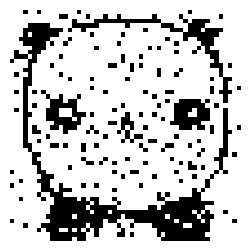

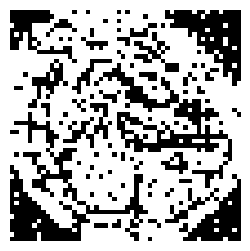

In [ ]:
imagenes_ruidosas = []
for imagen in lista_imagenes:
  imagen_usada = imagen.copy()
  estado = agregar_ruido(imagen_usada.copy(), 0.1)
  imagenes_ruidosas.append(estado)

for imagen in imagenes_ruidosas:
  mostrar_imagen(imagen)

Ahora reconstruimos las imagenes

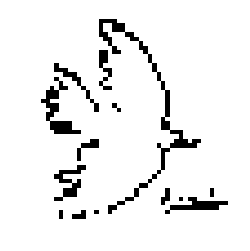

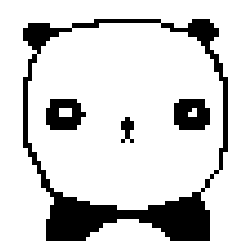

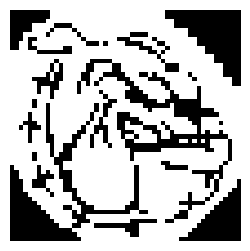

In [ ]:
imagenes_reconstruidas2 = []
for imagen in imagenes_ruidosas:
  imagen_reconstruida = reconstruir_imagen(n, matriz_red_pesos, imagen.copy())
  imagenes_reconstruidas2.append(imagen_reconstruida)

for imagen in imagenes_reconstruidas2:
  mostrar_imagen(imagen)

Vamos a probar el recuperador poniendo a las imagenes un ruido de 0.5 y 0.9

Las imagenes ruidosas son: 


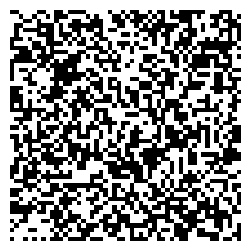

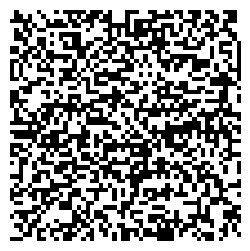

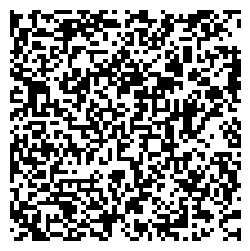

Este es el resultado de las imagenes reconstruidas: 


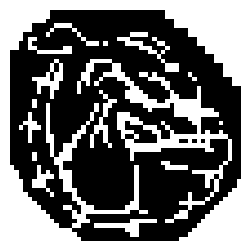

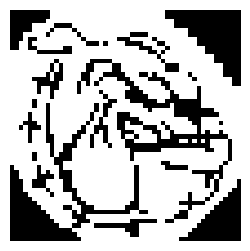

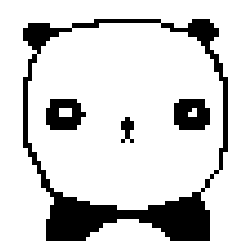

In [ ]:
#Con un ruido de 0.5
imagenes_ruidosas.clear()
imagenes_reconstruidas2.clear()
for imagen in lista_imagenes:
  imagen_usada = imagen.copy()
  estado = agregar_ruido(imagen_usada.copy(), 0.5)
  imagenes_ruidosas.append(estado)

print("Las imagenes ruidosas son: ")
for imagen in imagenes_ruidosas:
  mostrar_imagen(imagen)

for imagen in imagenes_ruidosas:
  imagen_reconstruida = reconstruir_imagen(n, matriz_red_pesos, imagen.copy())
  imagenes_reconstruidas2.append(imagen_reconstruida)

print("Este es el resultado de las imagenes reconstruidas: ")
for imagen in imagenes_reconstruidas2:
  mostrar_imagen(imagen)

Las imagenes ruidosas son: 


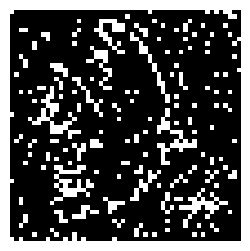

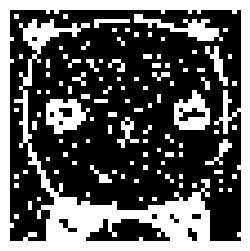

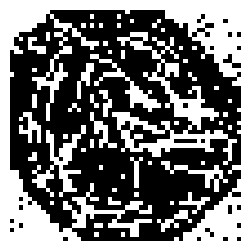

Este es el resultado de las imagenes reconstruidas: 


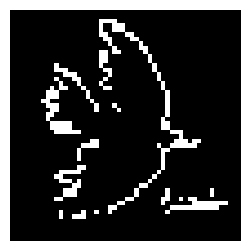

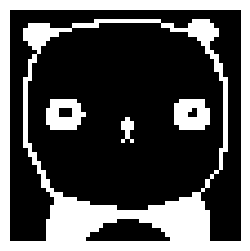

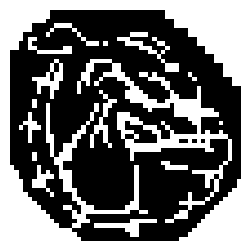

In [ ]:
#Con un ruido de 0.9
imagenes_ruidosas.clear()
imagenes_reconstruidas2.clear()
for imagen in lista_imagenes:
  imagen_usada = imagen.copy()
  estado = agregar_ruido(imagen_usada.copy(), 0.9)
  imagenes_ruidosas.append(estado)

print("Las imagenes ruidosas son: ")
for imagen in imagenes_ruidosas:
  mostrar_imagen(imagen)

for imagen in imagenes_ruidosas:
  imagen_reconstruida = reconstruir_imagen(n, matriz_red_pesos, imagen.copy())
  imagenes_reconstruidas2.append(imagen_reconstruida)

print("Este es el resultado de las imagenes reconstruidas: ")
for imagen in imagenes_reconstruidas2:
  mostrar_imagen(imagen)

###Seccion de pruebas de imagenes con pixeles borrados

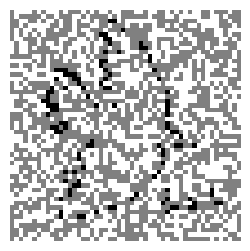

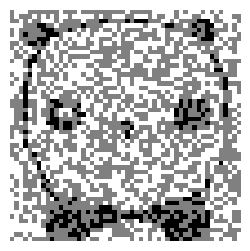

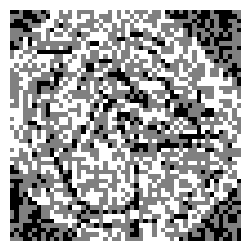

In [ ]:
imagenes_borradas = []
for imagen in lista_imagenes:
  imagen_usada = imagen.copy()
  estado = borrar_pixeles(imagen_usada.copy(), 0.5)
  imagenes_borradas.append(estado)

for imagen in imagenes_borradas:
  mostrar_imagen(imagen)

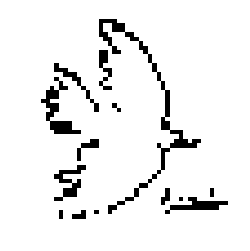

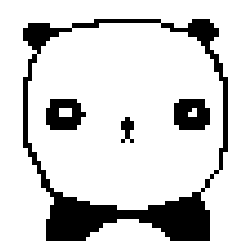

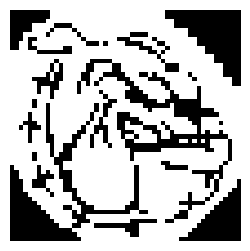

In [ ]:
imagenes_reconstruidas.clear()
for imagen in imagenes_borradas:
  imagen_reconstruida = reconstruir_imagen(n, matriz_red_pesos, imagen.copy())
  imagenes_reconstruidas.append(imagen_reconstruida)

for imagen in imagenes_reconstruidas:
  mostrar_imagen(imagen)

Conclusion: Lo reconstruyó re piola y eso que borre bastantes pixeles

Imagenes borrosas con 0.9 de pixeles borrados (Alto)


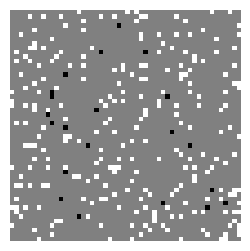

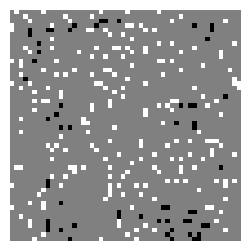

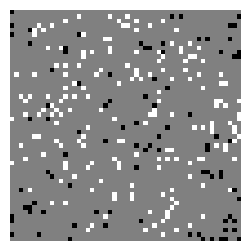

Imagenes reconstruidas con 0.9 de pixeles borrados (Alto)


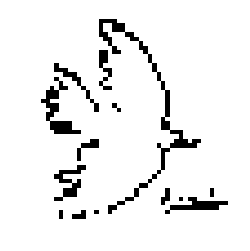

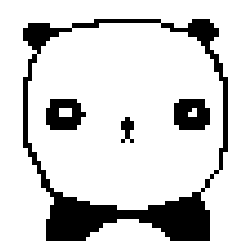

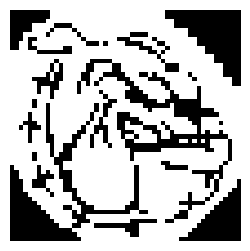

In [ ]:
imagenes_borradas.clear()
imagenes_reconstruidas.clear()
for imagen in lista_imagenes:
  imagen_usada = imagen.copy()
  estado = borrar_pixeles(imagen_usada.copy(), 0.9)
  imagenes_borradas.append(estado)

print("Imagenes borrosas con 0.9 de pixeles borrados (Alto)")
for imagen in imagenes_borradas:
  mostrar_imagen(imagen)

for imagen in imagenes_borradas:
  imagen_reconstruida = reconstruir_imagen(n, matriz_red_pesos, imagen.copy())
  imagenes_reconstruidas.append(imagen_reconstruida)

print("Imagenes reconstruidas con 0.9 de pixeles borrados (Alto)")
for imagen in imagenes_reconstruidas:
  mostrar_imagen(imagen)

La red Hopfield despues de recuperar imagenes con un alto porcentaje de pixeles borrados: 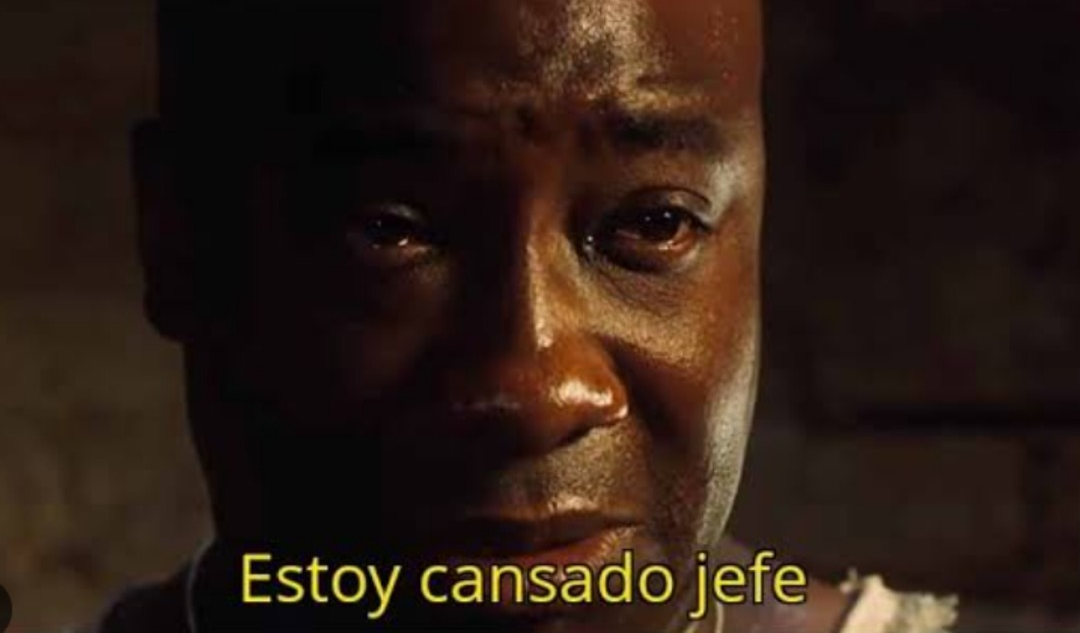

##Inciso c)

En esta sección, nos encargamos de la detección de estados espurios en la red (Casualmente, encontramos uno en el inciso cuando le pusimos 0.9 de ruido a las imagenes). Estos estados espurios se pueden presentar como patrones inversos, combinaciones de un numero impar de patrones.

Por definición, un estado espurio es un patron de activacion que no fue aprendido INTENCIONALMENTE pero que la red puede terminar recuperando igual.

Cuando la red se entrena con ciertos patrones, la misma guarda esos patrones como mínimos de energía en un espacio de estados. Sin embargo, debido a la forma en que funciona la dinámica de la red y la superposición de los patrones almacenados, pueden aparecer otros mínimos que no corresponden a ninguno de los patrones originales.

### En esta sección, vamos a probar la existencia de estados espurios por medio de patrones inversos. Un potencial estado espurio, es el inverso de un patron aprendido. Esto significa que por ejemplo, si la red aprendió de una imagen con un fondo blanco y figuras negras, su inversa tendría un fondo negro con figuras blancas.

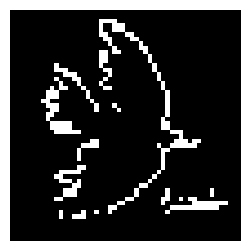

El patrón inverso es un estado espurio


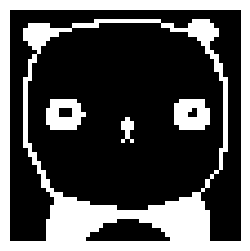

El patrón inverso es un estado espurio


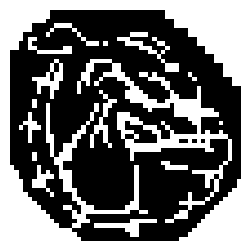

El patrón inverso es un estado espurio


In [ ]:
#Creamos los patrones inversos
patrones_inversos = []
for patron in lista_imagenes:
  patron_inverso = -patron.copy()
  patrones_inversos.append(patron_inverso)

for patron_inverso in patrones_inversos:
  patron_reconstruido = reconstruir_imagen(n, matriz_red_pesos, patron_inverso.copy())
  mostrar_imagen(patron_reconstruido)
  #Comparamos el patrón reconstruido con el patrón inverso
  if np.array_equal(patron_inverso, patron_reconstruido):
    print("El patrón inverso es un estado espurio")
  else:
    print("El patrón inverso no es un estado espurio")


###En esta sección, vamos a probar si la combinación de un número impar de patrones aprendidos puede generar estados espurios también.

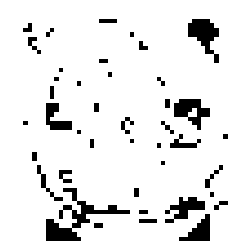

El patrón combinado es un estado espurio


In [ ]:
patron_combinado = lista_imagenes[0] + lista_imagenes[1] + lista_imagenes[2]
patron_combinado[patron_combinado > 0] = 1
patron_combinado[patron_combinado <= 0] = -1

patron_reconstruido = reconstruir_imagen(n, matriz_red_pesos, patron_combinado.copy())
mostrar_imagen(patron_reconstruido)

#Verificamos si el patrón reconstruido es un estado espurio
es_espurio = True
for patron in lista_imagenes:
  if np.array_equal(patron, patron_reconstruido):
    es_espurio = False
    break

if es_espurio:
  print("El patrón combinado es un estado espurio")
else:
  print("El patrón combinado no es un estado espurio")

##Inciso d)

### En esta sección, entrenaremos a la red con el resto de imagenes y verificamos si la red fue capaz de aprender de todas las imagenes.

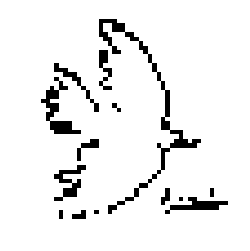

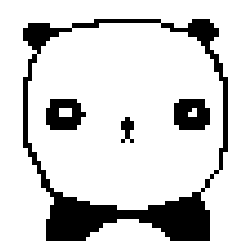

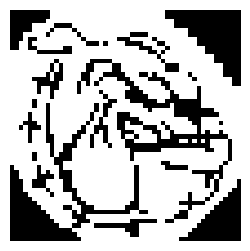

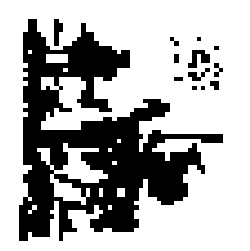

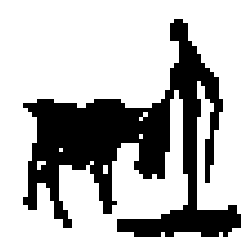

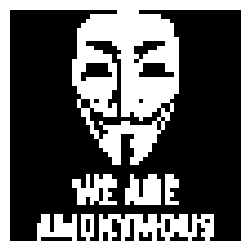

[[0. 6. 6. ... 6. 6. 6.]
 [6. 0. 6. ... 6. 6. 6.]
 [6. 6. 0. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 0. 6. 6.]
 [6. 6. 6. ... 6. 0. 6.]
 [6. 6. 6. ... 6. 6. 0.]]


In [ ]:
imagen3 = cargar_imagen('quijote.bmp', lado)
imagen4 = cargar_imagen('torero.bmp', lado)
imagen5 = cargar_imagen('v.bmp', lado)

lista_imagenes.append(imagen3)
lista_imagenes.append(imagen4)
lista_imagenes.append(imagen5)


for imagen in lista_imagenes:
  mostrar_imagen(imagen)

lista_matrices_pesos.clear()
for imagen in lista_imagenes:
  matriz_peso = calcular_pesos(imagen)
  matriz_peso = completar_ceros_diagonal(matriz_peso)
  lista_matrices_pesos.append(matriz_peso)

matriz_red_pesos = sumar_matrices_pesos(lista_matrices_pesos)
print(matriz_red_pesos)

La imagen no fue aprendida


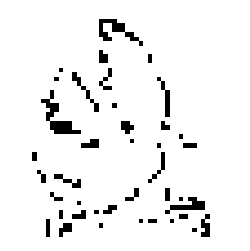

La imagen no fue aprendida


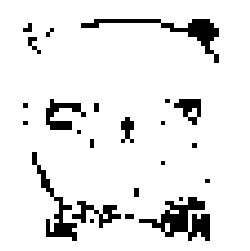

La imagen si fue aprendida
La imagen si fue aprendida
La imagen si fue aprendida
La imagen si fue aprendida


In [ ]:
for imagen in lista_imagenes:
  imagen_original = imagen.copy()
  imagen_reconstruida = reconstruir_imagen(n, matriz_red_pesos, imagen_original.copy())
  #Compara la imagen reconstruida con la original
  if (np.array_equal(imagen_original, imagen_reconstruida)):
    print("La imagen si fue aprendida")
  else:
    print("La imagen no fue aprendida")
    mostrar_imagen(imagen_reconstruida)

Argumento/Justificación:
---


Se entrenó la red de Hopfield con las 6 imágenes disponibles. Se observa que solo 4 de las 6 imágenes fueron correctamente aprendidas mientras que las imágenes de la paloma y el panda no fueron reconocidas adecuadamente.

Esto se debe a la capacidad limitada de la red, la cual depende del número de neuronas y del grado de similitud entre patrones. La capacidad máxima teórica de una red Hopfield es aproximadamente pmax = 0.138*N, donde:



1.   pmax = Cantidad maxima de patrones que se pueden almacenar sin errores.
2.   N = Número de neuronas.

Para este caso, pmax = 0.138*52*52= 0.138*2704 = 373 patrones (Aproximadamente). Y si bien, la capacidad máxima teórica demuestra que en el "ideal" debería aprenderse las 6 imágenes completas, lo cierto es que las imágenes de la paloma y el panda son en cierta medida similares y si bien, cuando se entrenó la red con las primeras 3 imagenes (paloma, panda y perro) logró aprender todas, la realidad es que al agregar mas patrones, la matriz de pesos se sobrecarga y como consecuencia, pierde información útil. Este fenómeno es comun en la red Hopfield cuando se supera su límite de almacenamiento efectivo o se utilizan patrones no ortogonales.  


#TP1-Ejercicio2-Hopfield

##Inciso a)

Para comprobar estadísticamente la capacidad de la red de Hopfield, podemos generar patrones pseudo-aleatorios y entrenar la red con ellos. Luego, podemos calcular la cantidad máxima de patrones aprendidos en función del tamaño de la red, para diferentes niveles de error (Perror).

In [ ]:
import pandas as pd
import numpy as np

# Parámetros
N = 1000  # número de neuronas
repeticiones_por_patron = 100  # cuántas veces repetimos la reconstrucción para un patrón en específico
cantidad_de_patrones_test = 10

# Valores de la tabla a reproducir
p_max_dividido_N_neuronas = [0.105, 0.138, 0.185, 0.37, 0.61]
valores_de_P_error_esperados = [0.001, 0.0036, 0.01, 0.05, 0.1]

# Funcion que realiza la funcion escalón. Si x >= 0, la funcion devuelve 1 y caso contrario devuelve -1.
def sign(x):
    return np.where(x >= 0, 1, -1)

# Experimento principal
resultados = []

for p_dividido_n, perror_esperado in zip(p_max_dividido_N_neuronas, valores_de_P_error_esperados): #Combinamos ambas listas con zip e iteramos con for
    p = int(round(p_dividido_n * N)) #Convertimos a entero el valor de la cantidad maxima de patrones para este caso
    errores_totales = 0
    total_de_bits_comprobados = 0

    for _ in range(repeticiones_por_patron):
        # 1. Generar patrones aleatorios
        patrones = np.random.choice([-1, 1], size=(p, N))

        # 2. Calcular matriz de pesos con la regla de Hebb
        W = np.dot(patrones.T, patrones) / N
        np.fill_diagonal(W, 0)  # eliminar autoconexiones

        # 3. Evaluar si los patrones son estables (una iteración sincrónica)
        test_patrones = patrones[np.random.choice(p, size=cantidad_de_patrones_test, replace=False)]
        for patron in test_patrones:
            updated = sign(np.dot(W, patron))
            errores_totales += np.sum(updated != patron)
            total_de_bits_comprobados += N

    # 4. Calcular P_error empírico
    P_error = errores_totales / total_de_bits_comprobados
    resultados.append((p_dividido_n, perror_esperado, round(P_error, 4)))

# Mostrar resultados en forma de tabla
df_resultados = pd.DataFrame(resultados, columns=["p_max / N", "P_error (teórico)", "P_error (experimental)"])
df_resultados


,p_max / N,P_error (teórico),P_error (experimental)
0,0.105,0.0010,0.0010
1,0.138,0.0036,0.0035
2,0.185,0.0100,0.0100
3,0.370,0.0500,0.0501
4,0.610,0.1000,0.1004


##Inciso b)

###Seccion de parámetros

In [ ]:
#Parámetros
N = 100 #Número de neuronas
patron_aleatorio_base = np.random.choice([-1, 1], size=(N)) #Generamos un patrón aleatorio
print(patron_aleatorio_base)
valores_probabilidad = np.linspace(0.0, 1.0, num = 11) #Los valores de r
cantidad_patrones = 50 #Cantidad de patrones generados
print(valores_probabilidad)

[ 1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1 -1
 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1 -1 -1  1 -1 -1
  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1 -1  1  1  1  1  1 -1
 -1 -1 -1  1]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


### Sección de generacion de patrones correlacionados

Vamos a realizar la generacion de patrones correlacionados con un solo patron base para todos los r. Esto se debe a dos motivos:

1.   Quiero medir como afecta r a la capacidad, manteniendo constante todo lo demas.
2.   Si cambio el patron base para cada r, estaría mezclando el efecto de r con el efecto de la aleatoriedad del patrón base.

In [ ]:
def generar_numeros_aleatorios(tamanio_patron):
  return(np.random.random(tamanio_patron))

def generar_patron_alterado_nuevo(numero_r, aleatorios, patron_base):
  patron_alterado_nuevo = []
  for i in range(len(aleatorios)):
    if aleatorios[i] < numero_r:
      patron_alterado_nuevo.append(-patron_base[i])
    else:
      patron_alterado_nuevo.append(patron_base[i])

  return patron_alterado_nuevo

def generar_patrones_correlacionados(patron_base, array_probabilidades, cant_patrones):
  lista_de_arrays_prob = [] #Aca vamos a guardar los arrays que guardan los 50 arrays generados por cada p de probabilidad
  tamanio_patron = len(patron_base)
  for p in array_probabilidades:
    grupo_patrones_probabilidades_p = []
    for _ in range(cant_patrones):
      numeros_aleatorios = generar_numeros_aleatorios(tamanio_patron)
      grupo_patrones_probabilidades_p.append(generar_patron_alterado_nuevo(p, numeros_aleatorios, patron_base))
    lista_de_arrays_prob.append(grupo_patrones_probabilidades_p)
  return(lista_de_arrays_prob)

### Sección donde se entrena la red

In [ ]:
def entrenar_hopfield(patrones):
    N = patrones.shape[1]
    W = np.zeros((N, N))
    for patron in patrones:
        W += np.outer(patron, patron)
    W /= N
    np.fill_diagonal(W, 0)  # No autoconexiones
    return W

### Seccion de recuperacion

In [ ]:
def actualizar(W, estado):
    return np.sign(W @ estado)

def recuperar(W, estado_inicial, pasos=200):
    estado = estado_inicial.copy()
    for _ in range(pasos):
        estado = actualizar(W, estado)
    return estado

  Aclaracion: El primer elemento de la lista son los patrones generados con r = 0, el segundo elemento son los patrones generados con r = 0.1 y así sucesivamente.


### Análisis de los resultados

In [ ]:
lista_de_arrays_por_prob = generar_patrones_correlacionados(patron_aleatorio_base, valores_probabilidad, cantidad_patrones)
errores_por_proba = []

for patrones_por_prob in lista_de_arrays_por_prob:
  patrones_por_prob = np.array(patrones_por_prob)
  matriz_red_pesos = entrenar_hopfield(patrones_por_prob)
  errores = []
  for patron in patrones_por_prob:
    #Agregamos ruido. Usamos la misma funcion del ejercicio 1 porque tambien sirve acá.
    patron_ruidoso = agregar_ruido(patron.copy(), 0.9)
    #Usamos la misma funcion que la del ejercicio 1 porque para este caso tambien sirve
    #reconstruir_imagen(N, matriz_red_pesos, patron_ruidoso.copy())
    patron_reconstruido = recuperar(matriz_red_pesos, patron_ruidoso.copy())
     # Comparar el patrón recuperado con el original (almacenado)
    error = np.mean(patron_reconstruido != patron)
    errores.append(error)
  errores_por_proba.append(np.mean(errores))  # Error promedio para esta probabilidad



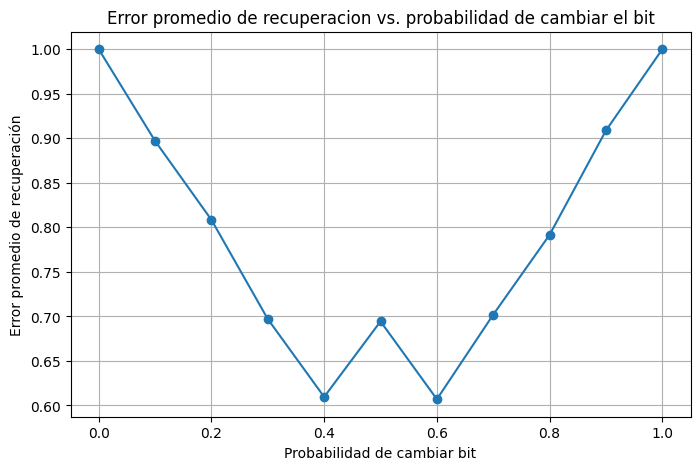

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(valores_probabilidad, errores_por_proba, marker='o')
plt.xlabel("Probabilidad de cambiar bit")
plt.ylabel("Error promedio de recuperación")
plt.title("Error promedio de recuperacion vs. probabilidad de cambiar el bit")
plt.grid(True)
plt.show()

Conclusion final:

1.   Observamos que el error por recuperacion de patrones alterados con un P(C) = 0 (Defino P(C) como la probabilidad de cambiar un bit, es decir, P("Cambiar bit") = P(C)) (En este caso, le agregamos ruido) es alto. Esto se debe a que con un P(C) = 0, todos los bits se mantienen igual y por lo tanto, todos los patrones generados por el patron base son iguales entre si e iguales al patron base. Esto implica tener el maximo valor de correlacion y como consecuencia, la red tiene poca capacidad para recuperar patrones alterados porque la red fue entrenada con copias del mismo patron.

2.   Observamos que el error por recuperacion con un P(C) = 1 tambien es alto. Esto se debe a que con un P(C) = 1 todos los bits se invierten. Como consecuencia de ello, todos los patrones generados por el patron base son el inverso a este ultimo pero entre los patrones generados son todos iguales.  Esto implica tener el maximo valor de anti-correlacion y como consecuencia, la red tambien tiene poca capacidad para recuperar patrones alterados porque la red fue entrenada con copias del mismo patron.

3. Se observa que para P(C) = 0.4 y P(C) = 0.6 es donde el error promedio de recuperacion es el mas bajo y esto tiene sentido porque es donde se ubica una  baja correlacion entre patrones generados y como consecuencia, la red tiene un mejor sistema de recuperacion de patrones alterados.

Aclaración: Para probar el sistema de recuperacion le agregado un 0.9 de ruido para alterar los patrones a recuperar.